# Visualizaciones en Python

La visualización de los datos es un aspecto fundamental en todo proyecto de Data Science, tanto como herramienta para el análisis como así también para la comunicación efectiva de los resultados. 

In [1]:
# Si no tenes instalado numpy o pandas elimina los '#' y ejecuta la celda

#!conda install matplotlib
#!conda install seaborn


In [2]:
import numpy as np
import pandas as pd

# --- Específicas para los gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# --------------------------------

In [3]:
#mpl.style.use('bmh')  		# bmh es el nombre del estilo que le gusta a coder

mpl.style.use('dark_background')   # dark_background es el nombre del estilo que le gusta al Juanma

Se pueden ver mas estilos de matplotlib en el siguiente link:

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

## Primera toma de contacto

Linea que une dos puntos:

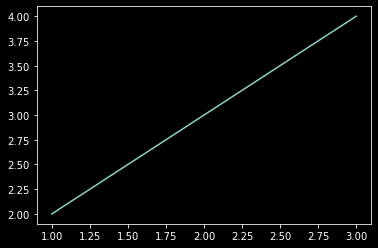

In [4]:
punto_x= [1,3]
punto_y= [2,4]

# Interfaz orientada a estados:
plt.plot(punto_x, punto_y)

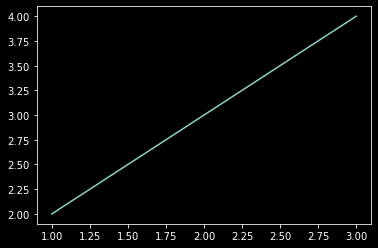

In [5]:
# Interfaz orientada a objetos
fig, ax = plt.subplots()    # plt.subplots() retorna dos objetos, uno tipo Figure y otro tipo Axes
ax.plot(punto_x, punto_y)   # Se manipula el grafico usando estos objetos

## Comandos basicos


In [6]:
# importamos pune_1965_to_2002.csv: Precipitation Data of Pune from 1965 to 2002

"""
Una forma de hacerlo:

# Carga de dataset
df_lluvias = pd.read_csv('pune_1965_to_2002.csv')

# Ponemos la columna Year en los indices
df_lluvias.index = df_lluvias['Year']

# Eliminamos la columna Year, para no tenerla de indice y columna a la vez
df_lluvias.drop('Year', axis='columns', inplace = True)

Pero se puede hacer mas rapido con:
"""

df_lluvias = pd.read_csv('pune_1965_to_2002.csv', index_col = 'Year')
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [7]:
# Grafiquemos las precipitaciones acumuladas para los distintos años

# Definimos los ejes 

x = df_lluvias.index
y = df_lluvias.sum(axis = 'columns')

# Notar como si vemos y es dificil visualizar los datos
print(x)
print(y)

Int64Index([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
            1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002],
           dtype='int64', name='Year')
Year
1965    1263.394
1966     899.588
1967    1522.184
1968    1086.237
1969    1739.022
1970    1273.507
1971    1176.612
1972     710.475
1973    1570.073
1974    1425.876
1975    1777.838
1976    1941.167
1977    1202.154
1978    1168.583
1979    1769.187
1980    1268.185
1981    1562.761
1982     943.087
1983    1616.948
1984    1538.961
1985    1214.852
1986    1267.969
1987    1197.999
1988    1822.649
1989    1400.024
1990    1766.294
1991    1497.256
1992    1323.883
1993    1210.252
1994    1987.689
1995    1209.068
1996    1631.331
1997    1844.840
1998    1603.243
1999    1235.683
2000    1094.062
2001    1045.825
2002    1024.881
dtype: float64


(1965.0, 2002.0)

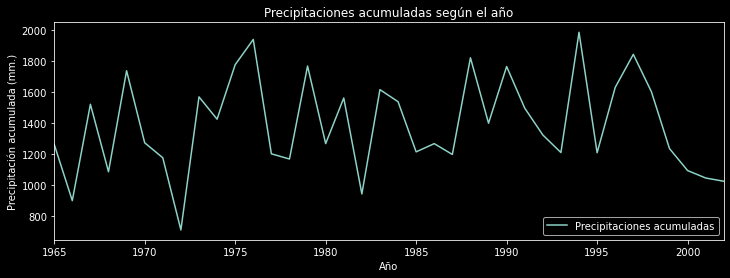

In [8]:
# Graficamos
fig, ax = plt.subplots(figsize = (12, 4))                 # figsize: Permite cambiar el tamaño del gráfico
ax.plot(x, y, label= 'Precipitaciones acumuladas')        # label:etiqueta del grafico para la leyenda
ax.set_xlabel('Año')                                      # Etiqueta eje x
ax.set_ylabel('Precipitación acumulada (mm.)')            # Etiqueta eje y
ax.set_title('Precipitaciones acumuladas según el año')   # Título
#ax.legend()                                              # Inserto la leyenda automaticamente
ax.legend(loc = 'lower right')                            # Inserta donde yo indico
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])    # Poner limites en el eje x

In [9]:
# Si no me acuerdo que parametro acepta un metodo o funcion
ax.legend?

In [10]:
# Guardar la visualizacion
# Formatos soportados: jpeg, jpg, png, pdf y svg

fig.savefig("precipitaciones_acumuladas_año.png")

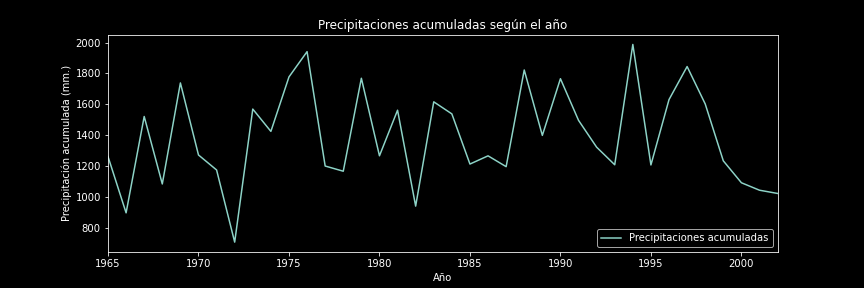

In [11]:
# Vemos una imagen guardada

from IPython.display import Image
Image(filename="precipitaciones_acumuladas_año.png")

## Enriqueciendo las visualizaciones

En ocasiones necesitamos resaltar ciertas características de los datos. 


In [12]:
maximo_enero = df_lluvias['Jan'].max()
maximo_febrero =  df_lluvias['Feb'].max()

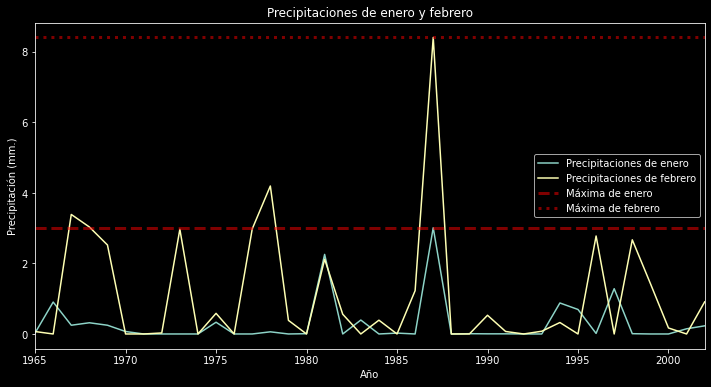

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
# Plots
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
# Lineas horizontales
ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Máxima de enero')
ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de febrero')
# Etiquetas
ax.set_xlabel('Año')
ax.set_ylabel('Precipitación (mm.)')
ax.set_title('Precipitaciones de enero y febrero') 
# Limites eje x
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])
# Leyenda
ax.legend()

## Subgraficos

Podemos definir una grilla de gráficos dentro de una misma figura.

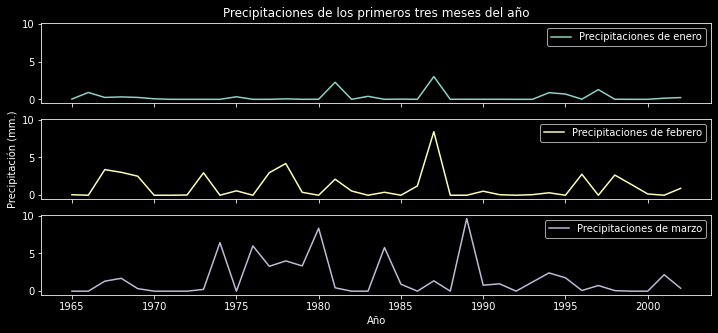

In [14]:
# La grilla tendra 3 filas y una columna
# sharex: Comparten la escala en el eje x
# sharey: Comparten la escala en el eje y
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')

ax[0].set_title('Precipitaciones de los primeros tres meses del año')
ax[2].set_xlabel('Año')
ax[1].set_ylabel('Precipitación (mm.)')

ax[0].legend()
ax[1].legend()
ax[2].legend()    


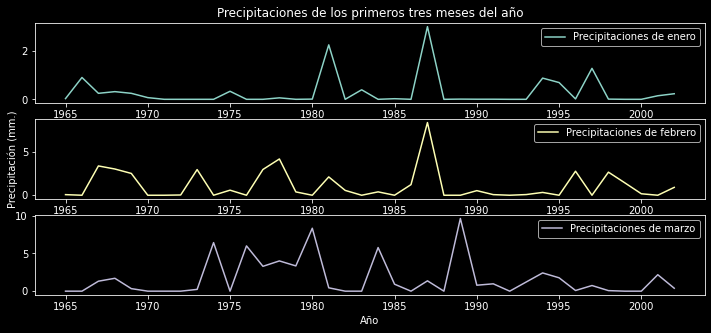

In [15]:
# Si no usamos sharex ni share y las escalas se adaptan para cada grafico
# Es mas dificil comparar los graficos al no usar las mismas escalas
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5))
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')

ax[0].set_title('Precipitaciones de los primeros tres meses del año')
ax[2].set_xlabel('Año')
ax[1].set_ylabel('Precipitación (mm.)')

ax[0].legend()
ax[1].legend()
ax[2].legend()

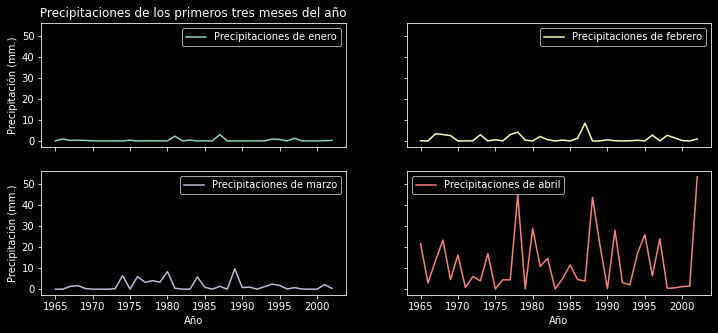

In [16]:
# Si usamos grilla de 2 x 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), sharex=True, sharey=True)
ax[0,0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[0,1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[1,0].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')
ax[1,1].plot(df_lluvias.index, df_lluvias['Apr'], label='Precipitaciones de abril', color='C3')

ax[0,0].set_title('Precipitaciones de los primeros tres meses del año')
ax[1,1].set_xlabel('Año')
ax[1,0].set_xlabel('Año')
ax[1,0].set_ylabel('Precipitación (mm.)')
ax[0,0].set_ylabel('Precipitación (mm.)')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

## Personalizando Matplotlib

Se puede modificar los parametros por defecto de Matplotlib

Text(0, 0.5, '(Etiqueta eje vert.)')

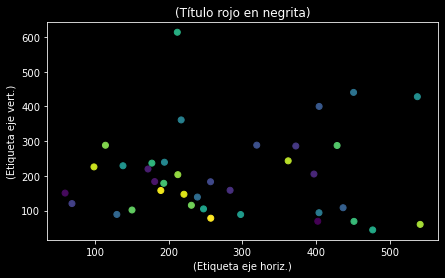

In [17]:
# Sin modificar ningun parametro
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
ax.set_title('(Título rojo en negrita)')
ax.set_xlabel('(Etiqueta eje horiz.)')
ax.set_ylabel('(Etiqueta eje vert.)')

In [35]:
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'firebrick'
mpl.rcParams['axes.labelcolor'] = 'lightblue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'white'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2' 

Text(0, 0.5, '(Etiqueta eje vert.)')

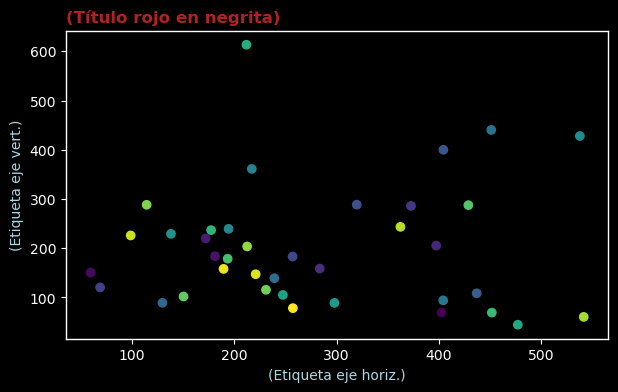

In [36]:
# Luego de modificar parametros base
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
ax.set_title('(Título rojo en negrita)')
ax.set_xlabel('(Etiqueta eje horiz.)')
ax.set_ylabel('(Etiqueta eje vert.)')

In [23]:
# Podemos restablecer los parametros por defecto
mpl.rcParams.update(mpl.rcParamsDefault)

## Metrovias 

In [24]:
metrovias = pd.read_excel("metrovias.xlsx", sheet_name = "Sheet2")

# para ver las primeras observaciones del df
metrovias.head()

,mes,pasajeros,evento
0,1993-01-01,8521,Entre 1994 y 1999 fueron incorporados 383 coch...
1,1993-02-01,9014,Entre 1994 y 1999 fueron incorporados 383 coch...
2,1993-03-01,12311,Entre 1994 y 1999 fueron incorporados 383 coch...
3,1993-04-01,10683,Entre 1994 y 1999 fueron incorporados 383 coch...
4,1993-05-01,12078,Entre 1994 y 1999 fueron incorporados 383 coch...


In [37]:
# Para ver los tipos de variables del data frame. 
# Necesitamos corroborar que la variables 'mes' esta en formato fecha
metrovias.dtypes

mes          datetime64[ns]
pasajeros             int64
dtype: object

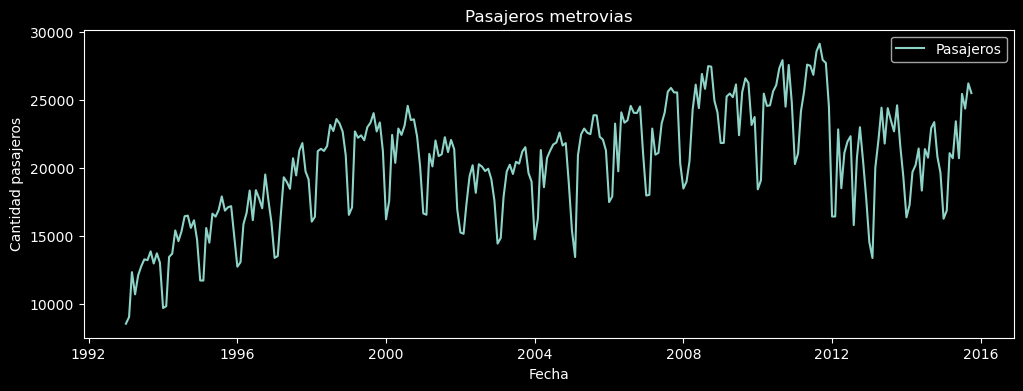

In [27]:
# En este caso la columna "evento" no me sirve asique la descarto
metrovias = metrovias.drop('evento', axis = 'columns')

mpl.style.use('dark_background') 

# PRIMERAMENTE REALIZAR EL GRAFICO SOLO
# Definimos los datos que van en los ejes x e y
x = metrovias['mes']
y = metrovias['pasajeros']

# Iniciamos la figura: 12 unidades de eje x, 4 unidades de eje y 
fig, ax = plt.subplots(figsize=(12, 4))  

# Definimos el graficos
ax.plot(x, y, label='Pasajeros')

# Personalizamos el grafico 
ax.set_xlabel('Fecha') # Etiqueta eje x
ax.set_ylabel('Cantidad pasajeros') # Etiqueta eje y
ax.set_title('Pasajeros metrovias') # Título
ax.legend() # Inserto la leyenda loc = 'upper_right'

Text(0.5, 0, 'Cantidad de pasajeros')

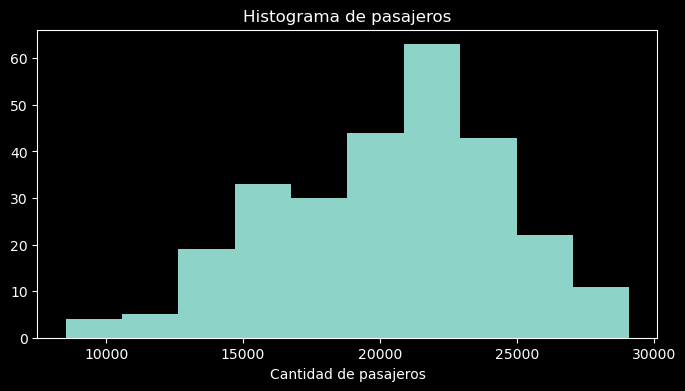

In [28]:
## SE ANIMAN CON EL HISTOGRAMA DE LA VARIABLE 'PASAJEROS'?
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(y)
ax.set_title('Histograma de pasajeros')
ax.set_xlabel('Cantidad de pasajeros')

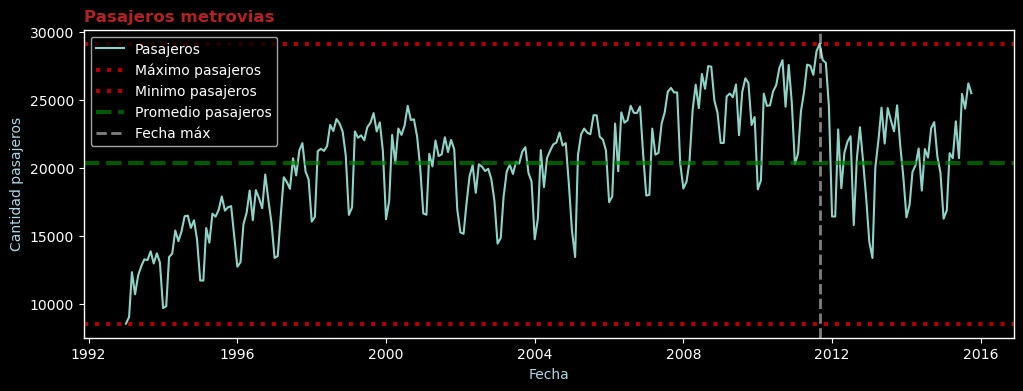

In [41]:
## AGREGAMOS AL GRÁFICO EL MAX, MIN y el PROMEDIO
max_pasajeros = metrovias['pasajeros'].max()
min_pasajeros = metrovias['pasajeros'].min()
avg_pasajeros = metrovias['pasajeros'].mean()

## UN EXTRA
# Fecha en la que alcanza el máximo -> filtrar el data frame en el max de pasajeros
fecha_max =  metrovias[metrovias['pasajeros'] == max_pasajeros]['mes']

max_pasajeros, min_pasajeros, avg_pasajeros

## Rehacemos el gráfico original
fig, ax = plt.subplots(figsize=(12, 4))  
ax.plot(x, y, label='Pasajeros')

## Agregamos las líneas horizontales
# Máximo
ax.axhline(max_pasajeros, 
           color='red', 
           linestyle=':', 
           alpha=0.7,    
           linewidth=3, 
           label='Máximo pasajeros')
# Mínimo
ax.axhline(min_pasajeros, 
           color='red', 
           linestyle=':', 
           alpha=0.7, 
           linewidth=3, label='Minimo pasajeros')
# Promedio
ax.axhline(avg_pasajeros, 
           color='green', 
           linestyle='--', 
           alpha=0.7, 
           linewidth=3, label='Promedio pasajeros')

# Fecha en donde alcanza el máximo
ax.axvline(fecha_max, 
           color='white', 
           linestyle='--', 
           alpha=0.5, 
           linewidth=2, 
           label='Fecha máx')


ax.set_xlabel('Fecha') # Etiqueta eje x
ax.set_ylabel('Cantidad pasajeros') # Etiqueta eje y
ax.set_title('Pasajeros metrovias') # Título
ax.legend() # Inserto la leyenda loc = 'upper_right'

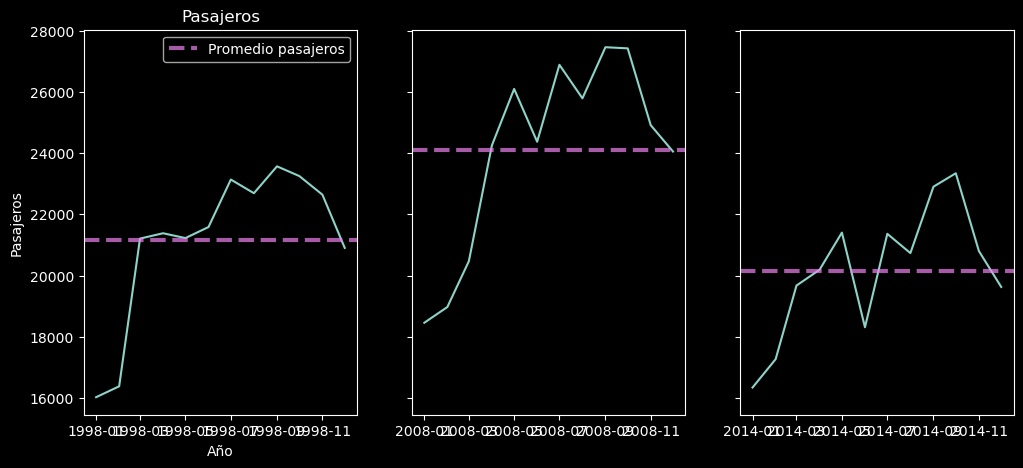

In [34]:
# SUBGRAFICOS
# REALIZAR LOS GRÁFICOS AÑOS 1998, 2008 Y 2014
# HACERLO EN 3 COLUMNAS 

metrovias_1998 = metrovias[metrovias['mes'].dt.year == 1998]
metrovias_2008 = metrovias[metrovias['mes'].dt.year == 2008]
metrovias_2014 = metrovias[metrovias['mes'].dt.year == 2014]


fig, ax = plt.subplots(nrows=1, # cantidad filas
                       ncols=3, # cantidad de columnas
                       figsize=(12, 5), # tamano del grafico
                       sharey=True) # subgráficos comparten la escala en el eje y


ax[0].plot(metrovias_1998['mes'], metrovias_1998['pasajeros'])
ax[0].axhline(metrovias_1998['pasajeros'].mean(), color='violet', 
           linestyle='--', alpha=0.7, linewidth=3, label='Promedio pasajeros')

ax[1].plot(metrovias_2008['mes'], metrovias_2008['pasajeros'])
ax[1].axhline(metrovias_2008['pasajeros'].mean(), color='violet', 
           linestyle='--', alpha=0.7, linewidth=3, label='Promedio pasajeros')

ax[2].plot(metrovias_2014['mes'], metrovias_2014['pasajeros'])
ax[2].axhline(metrovias_2014['pasajeros'].mean(), color='violet', 
           linestyle='--', alpha=0.7, linewidth=3, label='Promedio pasajeros')

ax[0].set_ylabel('Pasajeros')
ax[0].set_title('Pasajeros')
ax[0].set_xlabel('Año')  
ax[0].legend()  